In [115]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns

In [116]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Load Dataset**

In [117]:
df = pd.read_csv("Spam_SMS.csv")
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [118]:
df['Class'] = df['Class'].map({'ham': 0, 'spam': 1})  # Ubah Class menjadi biner (0 = ham, 1 = spam)

df.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-119-823f078e262b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Class'], palette="viridis")  # Tidak perlu hue


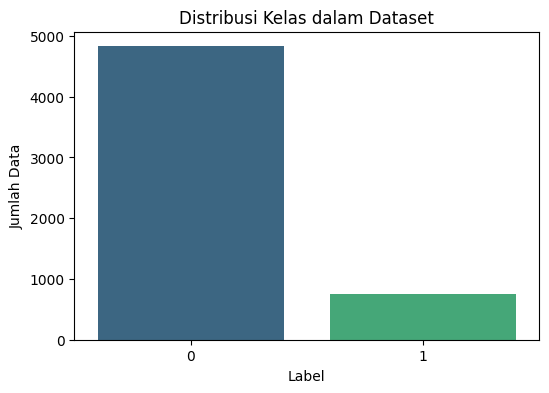

In [119]:
# Konversi ke string jika kolom berisi angka
df['Class'] = df['Class'].astype(str)

plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'], palette="viridis")  # Tidak perlu hue
plt.title("Distribusi Kelas dalam Dataset")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.show()

In [120]:
print("Jumlah data duplikat:", df.duplicated().sum())  # Hitung jumlah duplikat

Jumlah data duplikat: 415


In [121]:
df_cleaned = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df_cleaned.shape[0])

Jumlah data setelah menghapus duplikat: 5159


In [122]:
df.isnull().sum()

,0
Class,0
Message,0


# **Preprocessing**
Pada tahap ini saya mencoba menangani apabila ada nilai NaN, Convert semua huruf menjadi kecil, menghapus angka, menghapus karakter non-alfabet, menghapus spasi berlebih, dan menerapkan stopwords pada dataset

In [123]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Message'].astype(str).apply(clean_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Class,Message,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u ...
5570,0,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5571,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions
5572,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [124]:
# Cek apakah ada teks kosong setelah preprocessing
print("Deskripsi panjang teks setelah preprocessing:")
print(df['cleaned_text'].apply(lambda x: len(x.split())).describe())

Deskripsi panjang teks setelah preprocessing:
count    5574.000000
mean       14.866703
std        10.812713
min         0.000000
25%         7.000000
50%        12.000000
75%        21.000000
max       171.000000
Name: cleaned_text, dtype: float64


# **Word Cloud**

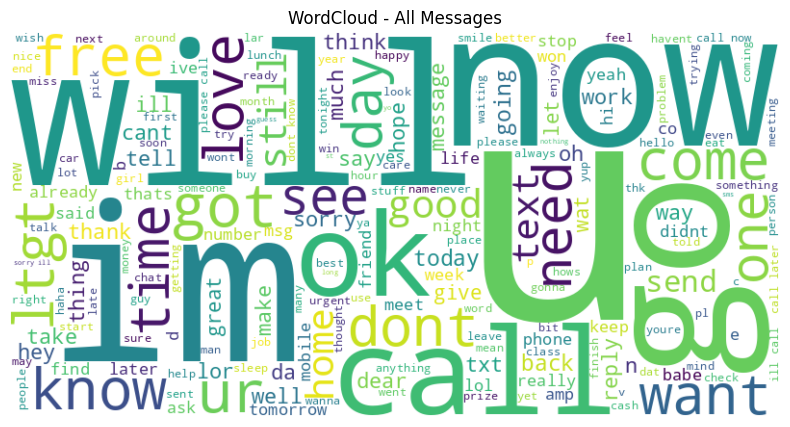

In [125]:
all_words = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - All Messages")
plt.show()

# **TF-IDF + n_grams**

### Menggunakan TfidVectorizer

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.95, stop_words=None)
X = vectorizer.fit_transform(df['cleaned_text'])

In [127]:
# Pastikan ada fitur yang dihasilkan
print("Jumlah fitur TF-IDF:", len(vectorizer.get_feature_names_out()))
print("Jumlah elemen non-nol di TF-IDF:", X.nnz)

Jumlah fitur TF-IDF: 3674
Jumlah elemen non-nol di TF-IDF: 81022


In [128]:
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)
print(df_tfidf.head())

   abiola  able  able to  about  about how  about me  about that  about the  \
0     0.0   0.0      0.0    0.0        0.0       0.0         0.0        0.0   
1     0.0   0.0      0.0    0.0        0.0       0.0         0.0        0.0   
2     0.0   0.0      0.0    0.0        0.0       0.0         0.0        0.0   
3     0.0   0.0      0.0    0.0        0.0       0.0         0.0        0.0   
4     0.0   0.0      0.0    0.0        0.0       0.0         0.0        0.0   

   about this  about to  ...  youre not  yours  yours call  yourself  youve  \
0         0.0       0.0  ...        0.0    0.0         0.0       0.0    0.0   
1         0.0       0.0  ...        0.0    0.0         0.0       0.0    0.0   
2         0.0       0.0  ...        0.0    0.0         0.0       0.0    0.0   
3         0.0       0.0  ...        0.0    0.0         0.0       0.0    0.0   
4         0.0       0.0  ...        0.0    0.0         0.0       0.0    0.0   

    yr  yrs  yun  yup  zed  
0  0.0  0.0  0.0  0.0

### Menggunakan CountVectorizer

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.95, stop_words=None)
X = vectorizer.fit_transform(df['cleaned_text'])

In [130]:
print("Jumlah fitur CountVectorizer:", len(vectorizer.get_feature_names_out()))
print("Jumlah elemen non-nol di CountVectorizer:", X.nnz)

Jumlah fitur CountVectorizer: 3674
Jumlah elemen non-nol di CountVectorizer: 81022


In [131]:
feature_names = vectorizer.get_feature_names_out()
df_count = pd.DataFrame(X.toarray(), columns=feature_names)

print("Hasil CountVectorizer:")
print(df_count.head())

Hasil CountVectorizer:
   abiola  able  able to  about  about how  about me  about that  about the  \
0       0     0        0      0          0         0           0          0   
1       0     0        0      0          0         0           0          0   
2       0     0        0      0          0         0           0          0   
3       0     0        0      0          0         0           0          0   
4       0     0        0      0          0         0           0          0   

   about this  about to  ...  youre not  yours  yours call  yourself  youve  \
0           0         0  ...          0      0           0         0      0   
1           0         0  ...          0      0           0         0      0   
2           0         0  ...          0      0           0         0      0   
3           0         0  ...          0      0           0         0      0   
4           0         0  ...          0      0           0         0      0   

   yr  yrs  yun  yup  zed  

In [132]:
# Cek apakah ada nilai non-nol sebelum dikonversi
print("Matriks CountVectorizer untuk dokumen pertama:")
print(X[0])
print(X[0].toarray())

Matriks CountVectorizer untuk dokumen pertama:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 15 stored elements and shape (1, 3674)>
  Coords	Values
  (0, 1048)	1
  (0, 3158)	1
  (0, 2315)	1
  (0, 631)	1
  (0, 229)	1
  (0, 2151)	1
  (0, 1353)	1
  (0, 362)	1
  (0, 1096)	1
  (0, 3480)	1
  (0, 1561)	1
  (0, 526)	1
  (0, 2909)	1
  (0, 1084)	1
  (0, 3284)	1
[[0 0 0 ... 0 0 0]]


In [133]:
doc_0_features = X[0].nonzero()[1]  # Ambil indeks fitur yang non-zero
print([feature_names[i] for i in doc_0_features])  # Tampilkan kata-katanya

['go', 'until', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'great', 'world', 'la', 'cine', 'there', 'got', 'wat']
